# Numerical Integration

In calculus, you learned that integration finds the area under a curve. You computed integrals using **Riemann sums** - dividing the region into rectangles and adding up their areas. As you made the rectangles narrower, the approximation improved.

**Numerical integration** uses the same core idea, but with more sophisticated shapes than rectangles. Instead of taking the limit as the width goes to zero (which requires knowing the function analytically), we use a finite number of carefully chosen sample points to get accurate approximations.

## Why Numerical Integration Matters

Numerical integration is essential in physics and engineering because:
- **Many integrals have no closed-form solution** - You can't write down an answer using elementary functions
- **Experimental data is discrete** - Real measurements give you points, not continuous functions  
- **Complex realistic problems** - Numerical methods handle messy real-world situations that symbolic math cannot

**Connection to Differentiation**: In the previous notebook, we approximated derivatives using finite differences. Integration is the inverse operation - instead of finding slopes, we're finding areas. However, unlike differentiation (which amplifies noise), integration tends to **smooth out** errors. This makes numerical integration generally more accurate and stable than numerical differentiation!

## Quadrature

**Quadrature** is the mathematical term for numerical integration. The name comes from the ancient Greek problem of finding a square with the same area as a given curved region ("squaring the circle").

We will focus on three fundamental methods:

* **Trapezoid Rule** – Approximates the area using trapezoids  
* **Simpson's Rule** – Uses parabolic segments for improved accuracy  
* **Romberg Integration** – Refines estimates iteratively through extrapolation to maximum accuracy

Each method approximates an integral as a weighted sum of function values:

$$
\int_a^b f(x)\,dx \approx \sum_{k=1}^N w_k f(x_k)
$$

where:
- $x_k$ are the sample points where we evaluate the function  
- $w_k$ are weights that depend on the chosen method
- $N$ is the number of sample points
- $h = (b-a)/N$ is typically the spacing between points (the "step size")

The choice of method directly impacts accuracy. The Trapezoid Rule is simple and works well for smooth functions. Simpson's Rule achieves better accuracy by fitting curves instead of straight lines. Romberg Integration takes this further by systematically refining estimates - each iteration roughly doubles the number of accurate digits!

In the following sections, we'll explore each method, understand how they work, and learn when to use them.ccuracy with fewer steps.


## Trapezoid Rule

One of the simplest numerical integration methods is the **Trapezoid Rule**, which approximates the area under a curve by dividing it into a series of trapezoids. Instead of approximating the function with rectangles (as in Riemann sums), we use trapezoids to achieve a more accurate estimate of the integral.

Think of it this way: if you connect consecutive sample points with straight lines, you create a piecewise-linear approximation of your function. The area under these line segments is easy to calculate - it's just a sum of trapezoid areas!

The integral we seek to approximate is:

$$I(a, b) = \int_a^b f(x)\,dx$$

### Deriving the Formula

The area of a single trapezoid with base width $h$ and heights given by function values at two consecutive points is:

$$A_k = \frac{1}{2} h \left[ f(a + (k - 1)h) + f(a + kh) \right]$$

Summing over all $N$ trapezoids from $x = a$ to $x = b$, we obtain:

$$I(a, b) \approx \frac{1}{2} h \sum_{k=1}^N \left[ f(a + (k - 1)h) + f(a + kh) \right]$$

Rearranging the summation to avoid double-counting interior points:

$$I(a, b) \approx h \left[ \frac{1}{2} f(a) + \frac{1}{2} f(b) + \sum_{k=1}^{N-1} f(a + kh) \right]$$

This formulation highlights an important computational advantage:  
- Interior points $f(a+kh)$ for $k=1,2,...,N-1$ are counted once with full weight
- Endpoint values $f(a)$ and $f(b)$ are weighted by $\frac{1}{2}$ to avoid double-counting

Let's see this in action:

In [6]:
import integrate as intg
import numpy as np
import matplotlib.pyplot as plt

# Define a test function
def f(x):
    return np.sin(x)

# Integration limits
a, b = 0, np.pi
N = 4  # Number of intervals

# Compute the integral using trapezoid rule
trap_result = intg.trapezoidrule(f, a, b, N)

# Exact integral value for comparison
exact_value = 2.0

# Print numerical results
print(f"Exact integral of sin(x) from 0 to π: {exact_value}")
print(f"Trapezoid Rule (N={N}): {trap_result:.6f}")
print(f"Absolute error: {abs(trap_result - exact_value):.6f}")
print(f"Relative error: {abs(trap_result - exact_value)/exact_value * 100:.2f}%")

Exact integral of sin(x) from 0 to π: 2.0
Trapezoid Rule (N=4): 1.896119
Absolute error: 0.103881
Relative error: 5.19%


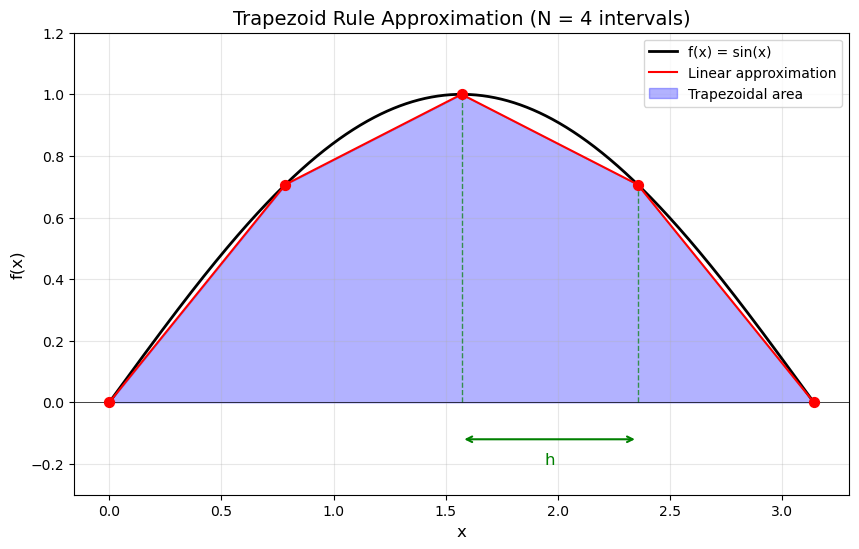

In [7]:
# Create visualization
x = np.linspace(a, b, N + 1)  # Sample points
fx = np.linspace(a, b, 1000)   # High-resolution for smooth curve

plt.figure(figsize=(10, 6))

# Plot the actual function
plt.plot(fx, f(fx), 'k-', linewidth=2, label='f(x) = sin(x)')

# Plot the trapezoid approximation (piecewise linear)
plt.plot(x, f(x), 'r-', linewidth=1.5, label='Linear approximation')

# Fill the area under trapezoids
plt.fill_between(x, f(x), alpha=0.3, color='blue', label="Trapezoidal area")

# Show the sample points
plt.scatter(x, f(x), color='red', s=50, zorder=5)

# Annotate one trapezoid to show the geometry
if N >= 4:
    mid_idx = N // 2
    # Draw vertical lines at edges of one trapezoid
    plt.plot([x[mid_idx], x[mid_idx]], [0, f(x[mid_idx])], 'g--', linewidth=1, alpha=0.7)
    plt.plot([x[mid_idx+1], x[mid_idx+1]], [0, f(x[mid_idx+1])], 'g--', linewidth=1, alpha=0.7)
    # Label the width
    plt.annotate('', xy=(x[mid_idx+1], -0.12), xytext=(x[mid_idx], -0.12),
                arrowprops=dict(arrowstyle='<->', color='green', lw=1.5))
    plt.text((x[mid_idx] + x[mid_idx+1])/2, -0.2, 'h', ha='center', fontsize=12, color='green')

plt.axhline(y=0, color='k', linewidth=0.5)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title(f'Trapezoid Rule Approximation (N = {N} intervals)', fontsize=14)
plt.legend(fontsize=10, loc='upper right')
plt.grid(True, alpha=0.3)
plt.ylim(-0.3, 1.2)
plt.show()

### Estimating the Error

How do we know if our approximation is good enough? We can estimate the error using `trapezoiderr()`:

In [8]:
error_estimate = intg.trapezoiderr(f, a, b, N)
print(f"Estimated error: {error_estimate:.6f}")
print(f"Actual error: {abs(trap_result - exact_value):.6f}")
print("\nThe error estimate is reasonably close to the actual error!")

Estimated error: 0.108441
Actual error: 0.103881

The error estimate is reasonably close to the actual error!


**How does this work?** The error estimation function computes the integral twice:
- Once with N steps
- Again with N/2 steps (half as many, so larger step size)

The difference between these two results tells us approximately how much error remains in the more refined calculation. We'll discuss this technique in more detail later when we cover error analysis.

**Key Observation**: Notice that the trapezoid approximation tends to *underestimate* the integral for sin(x). This happens because straight lines cut corners on the curves. For concave-down functions (curving downward), trapezoids underestimate; for concave-up functions, they *overestimate*.

## Simpson's Rule

The Trapezoid Rule works by connecting consecutive points with straight lines. But what if the function curves significantly between sample points? The straight lines will cut through the curves, missing area above or below.

**Simpson's Rule** improves accuracy by fitting parabolas (quadratic curves) instead of straight lines. Since parabolas can curve, they follow the function's shape much better, especially for smooth functions with curvature.

*The trade-off*: Simpson's Rule requires an *even* number of intervals ($N$ must be even) because we fit parabolas through groups of three consecutive points.

### Deriving Simpson's Rule

To derive Simpson's Rule, we approximate the function using a quadratic polynomial over each pair of intervals. Consider three consecutive points with the middle point at the origin:

$$f(x) = Ax^2 + Bx + C$$

Given function values at three equally-spaced points $x = -h, 0, h$, we can express them in terms of the polynomial coefficients:

$$f(-h) = Ah^2 - Bh + C$$
$$f(0) = C$$
$$f(h) = Ah^2 + Bh + C$$

Solving for the coefficients:

$$A = \frac{1}{2h^2} \left[ f(-h) - 2f(0) + f(h) \right]$$
$$B = \frac{1}{2h} [f(h) - f(-h)]$$
$$C = f(0)$$

Now we integrate this quadratic approximation over the interval $[-h, h]$:

$$\int_{-h}^{h} (Ax^2 + Bx + C)\,dx = \left[\frac{Ax^3}{3} + \frac{Bx^2}{2} + Cx\right]_{-h}^{h}$$

Notice that the $Bx^2$ term vanishes (odd function integrated over symmetric interval):

$$= \frac{2Ah^3}{3} + 2Ch$$

Substituting our expressions for $A$ and $C$ and simplifying:

$$\int_{-h}^{h} f(x)\,dx \approx \frac{h}{3} \left[ f(-h) + 4f(0) + f(h) \right]$$

This is Simpson's Rule for a single parabolic segment.
### Generalizing to Multiple Intervals

For a general integral $I(a, b) = \int_a^b f(x)\,dx$ divided into $N$ intervals (where $N$ must be even), we apply Simpson's formula repeatedly:

$$I(a, b) \approx \frac{h}{3} \left[ f(a) + 4f(a + h) + 2f(a + 2h) + 4f(a + 3h) + 2f(a + 4h) + \cdots + 4f(b-h) + f(b) \right]$$

Notice the pattern of coefficients: **1, 4, 2, 4, 2, 4, ..., 2, 4, 1**

We can express this more compactly:

$$I(a, b) \approx \frac{h}{3} \left[ f(a) + f(b) + 4 \sum_{k \text{ odd}}^{N-1} f(a + kh) + 2 \sum_{k \text{ even}}^{N-2} f(a + kh) \right]$$

### Key Takeaways

- **Simpson's Rule uses weighted coefficients**: 4 for odd-indexed points, 2 for even-indexed interior points, 1 for endpoints
- **Requires even N**: We need pairs of intervals to fit parabolas through groups of three points
- **Higher accuracy than Trapezoid Rule**: For the same step size, Simpson's Rule is significantly more accurate because parabolas capture curvature

Let's see Simpson's Rule in action and compare it to the Trapezoid Rule:

In [9]:
import integrate as intg
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return np.sin(x)

# Integration limits
a, b = 0, np.pi
N = 8  # Must be even for Simpson's rule

# Compute integrals using both methods
trap_result = intg.trapezoidrule(f, a, b, N)
simp_result = intg.simpsonrule(f, a, b, N)
exact_value = 2.0

# Print comparison
print(f"Exact integral: {exact_value}")
print(f"\nTrapezoid Rule (N={N}): {trap_result:.10f}")
print(f"  Error: {abs(trap_result - exact_value):.2e}")
print(f"\nSimpson's Rule (N={N}): {simp_result:.10f}")
print(f"  Error: {abs(simp_result - exact_value):.2e}")
print(f"\nSimpson's Rule is {abs(trap_result - exact_value)/abs(simp_result - exact_value):.1f}x more accurate.")


Exact integral: 2.0

Trapezoid Rule (N=8): 1.9742316019
  Error: 2.58e-02

Simpson's Rule (N=8): 2.0002691699
  Error: 2.69e-04

Simpson's Rule is 95.7x more accurate.


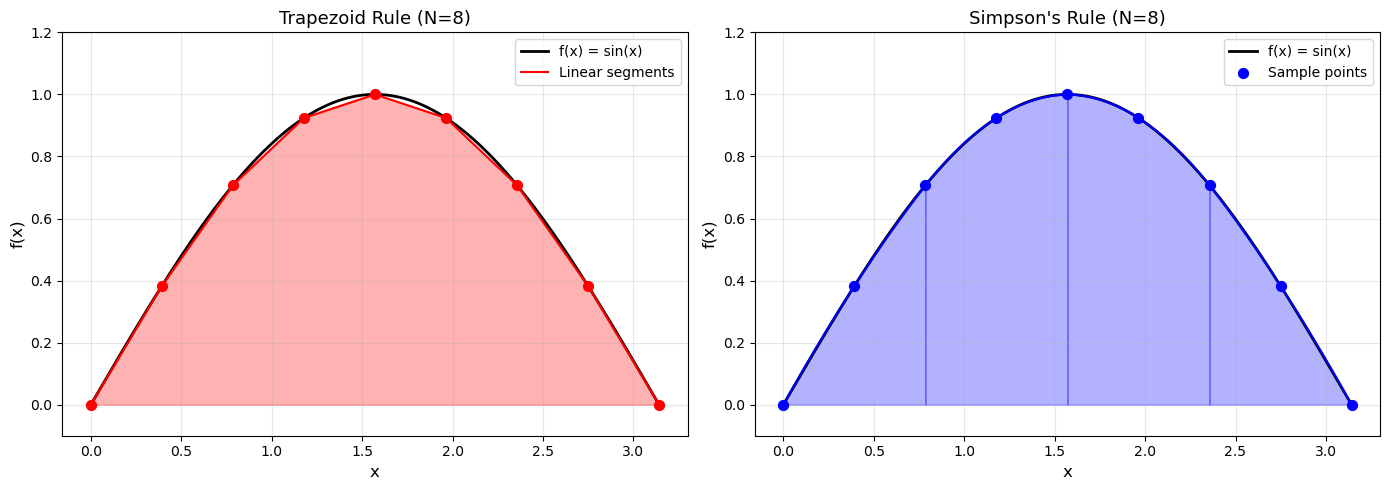

In [10]:
# Generate x values for visualization
x = np.linspace(a, b, N + 1)
fx = np.linspace(a, b, 1000)  # High-resolution for smooth curve

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Trapezoid Rule
ax1.plot(fx, f(fx), 'k-', linewidth=2, label='f(x) = sin(x)')
ax1.plot(x, f(x), 'r-', linewidth=1.5, label='Linear segments')
ax1.fill_between(x, f(x), alpha=0.3, color='red')
ax1.scatter(x, f(x), color='red', s=50, zorder=5)
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('f(x)', fontsize=12)
ax1.set_title(f'Trapezoid Rule (N={N})', fontsize=13)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-0.1, 1.2)

# Right plot: Simpson's Rule with parabolic segments
ax2.plot(fx, f(fx), 'k-', linewidth=2, label='f(x) = sin(x)')

# Draw parabolic segments
for i in range(0, N, 2):
    x_sample = x[i:i+3]  # Three points for each parabola
    y_sample = f(x_sample)
    
    # Fit a quadratic polynomial
    coeffs = np.polyfit(x_sample, y_sample, 2)
    
    # Generate smooth curve for this parabolic segment
    x_curve = np.linspace(x_sample[0], x_sample[-1], 50)
    y_curve = np.polyval(coeffs, x_curve)
    
    # Plot the parabolic segment
    ax2.plot(x_curve, y_curve, 'b-', linewidth=1.5)
    ax2.fill_between(x_curve, y_curve, alpha=0.3, color='blue')

# Scatter plot sample points
ax2.scatter(x, f(x), color='blue', s=50, zorder=5, label='Sample points')

ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('f(x)', fontsize=12)
ax2.set_title(f"Simpson's Rule (N={N})", fontsize=13)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim(-0.1, 1.2)

plt.tight_layout()
plt.show()

**What do you notice?**

Look at how the parabolic segments (blue curves on the right) hug the actual function much more closely than the straight line segments (red, on the left). This is why Simpson's Rule achieves better accuracy with the same number of sample points.

The parabolas capture the curvature of sin(x), while straight lines cut through the curves and miss area.

In [11]:
# Estimate errors for both methods
trap_error = intg.trapezoiderr(f, a, b, N)
simp_error = intg.simpsonerr(f, a, b, N)

print("Error Estimates:")
print(f"Trapezoid Rule: {trap_error:.2e}")
print(f"Simpson's Rule:  {simp_error:.2e}")
print(f"\nSimpson's error estimate is {trap_error/simp_error:.1f}x smaller.")

Error Estimates:
Trapezoid Rule: 2.60e-02
Simpson's Rule:  2.86e-04

Simpson's error estimate is 91.0x smaller.


### When to Use Simpson's Rule

**Use Simpson's Rule when:**
- You have a smooth function with curvature
- You need higher accuracy without dramatically increasing the number of points
- Your function can be evaluated at any point (not just pre-existing data)
- You can ensure N is even

**Use Trapezoid Rule when:**
- You have pre-existing data points at irregular intervals
- The function is nearly linear over each interval
- Simplicity is more important than maximum accuracy
- N doesn't need to be even

## Understanding Error in Numerical Integration

When using numerical integration, we need to understand two competing sources of error:

1. **Approximation Error**: The inherent error from approximating a smooth curve with a finite number of geometric shapes
2. **Roundoff Error**: Error due to finite precision in computer arithmetic (typically around $10^{-16}$ for standard floating-point numbers)

### Good News: Integration Smooths Errors!

Unlike numerical differentiation (which amplifies noise), integration tends to **average out** or **smooth** errors. This makes numerical integration:
- More stable than differentiation
- Less sensitive to noise in data
- Generally more accurate with fewer points

Think about it physically: when you add up many small contributions (integration), random errors tend to cancel out. When you compute differences (differentiation), errors can compound.

### Approximation Errors

The Approximation error depends on which method you use and how many steps you take:

**Trapezoid Rule**: 
$$\epsilon_{trap} \propto h^2$$

This means the Trapezoid Rule is a **second-order method** (accurate to $O(h)$). If you halve the step size $h$, the error decreases by approximately a factor of 4.

**Simpson's Rule**: 
$$\epsilon_{simp} \propto h^4$$

Simpson's Rule is a **fourth-order method** (accurate to $O(h^3)$). If you halve the step size $h$, the error decreases by approximately a factor of 16!

This is why Simpson's Rule is so much more accurate than the Trapezoid Rule for the same number of points.

### A Practical Way to Estimate Error

In practice, we usually don't know the exact answer (that's why we're integrating numerically). So how do we estimate our error?

**The Key Idea**: Compute the integral twice with different step sizes, then use the difference to estimate the error.

Here's how it works:

1. Compute the integral with $N$ steps → get result $I_1$
2. Compute the integral with $2N$ steps (half the step size) → get result $I_2$
3. Use the difference to estimate the error in $I_2$

Since we know how error scales with step size:
- **For Trapezoid Rule**: The error in $I_2$ is approximately $\epsilon_2 \approx \frac{1}{3}(I_2 - I_1)$
- **For Simpson's Rule**: The error in $I_2$ is approximately $\epsilon_2 \approx \frac{1}{15}(I_2 - I_1)$

**Why these factors?** When we halve the step size:
- Trapezoid error decreases by factor of 4, so: $\epsilon_1 = 4\epsilon_2$
- From $I_1 + \epsilon_1 = I_2 + \epsilon_2$, we get: $I_1 + 4\epsilon_2 = I_2 + \epsilon_2$
- Solving: $\epsilon_2 = \frac{1}{3}(I_2 - I_1)$

Let's see this in action:

In [12]:
import integrate as intg
import numpy as np
import matplotlib.pyplot as plt

# Define our test function
def f(x):
    return np.sin(x)

a, b = 0, np.pi
exact_value = 2.0

# Test with increasing numbers of steps
N_values = [4, 8, 16, 32, 64, 128]
trap_errors = []
simp_errors = []
trap_estimates = []
simp_estimates = []

print("N      Trapezoid Error    Estimated    Simpson Error      Estimated")
print("-" * 72)

for N in N_values:
    # Compute integrals
    trap_result = intg.trapezoidrule(f, a, b, N)
    simp_result = intg.simpsonrule(f, a, b, N)
    
    # Actual errors
    trap_err = abs(trap_result - exact_value)
    simp_err = abs(simp_result - exact_value)
    
    # Estimated errors
    trap_est = intg.trapezoiderr(f, a, b, N)
    simp_est = intg.simpsonerr(f, a, b, N)
    
    trap_errors.append(trap_err)
    simp_errors.append(simp_err)
    trap_estimates.append(trap_est)
    simp_estimates.append(simp_est)
    
    print(f"{N:3d}    {trap_err:.6e}    {trap_est:.6e}    {simp_err:.6e}      {simp_est:.6e}")

N      Trapezoid Error    Estimated    Simpson Error      Estimated
------------------------------------------------------------------------
  4    1.038811e-01    1.084409e-01    4.559755e-03      5.989023e-03
  8    2.576840e-02    2.603757e-02    2.691699e-04      2.860390e-04
 16    6.429656e-03    6.446247e-03    1.659105e-05      1.683859e-05
 32    1.606639e-03    1.607672e-03    1.033369e-06      1.037179e-06
 64    4.016114e-04    4.016759e-04    6.453000e-08      6.458929e-08
128    1.003998e-04    1.004038e-04    4.032257e-09      4.033183e-09


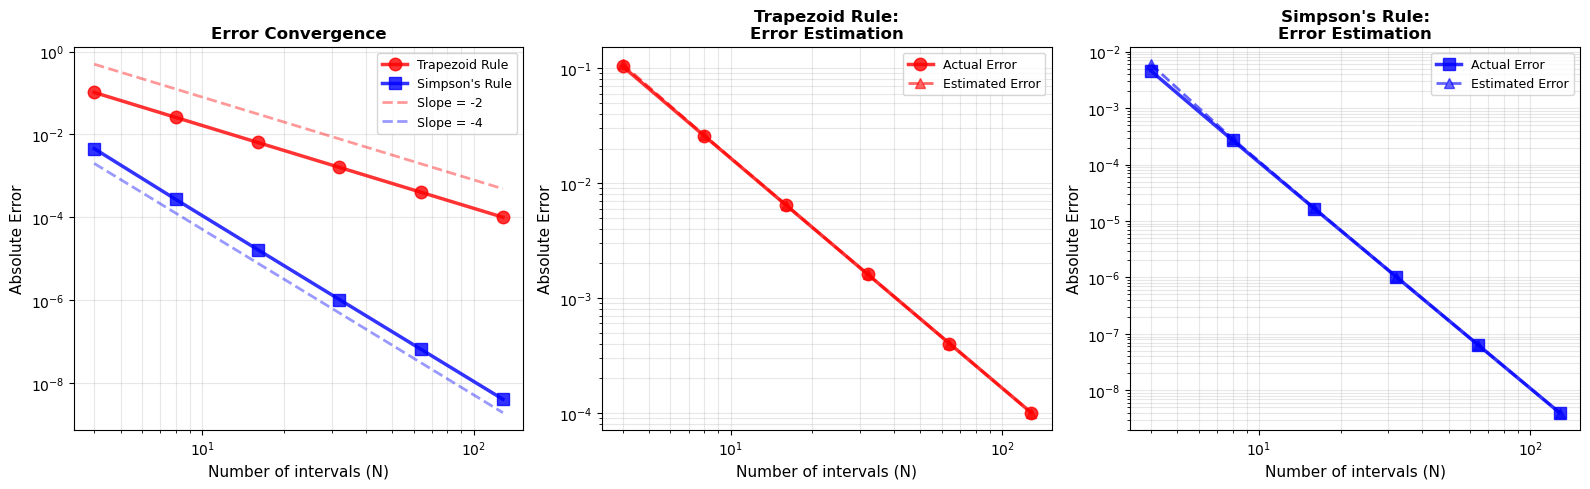

In [13]:
# Create a 3-panel visualization
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Panel 1: Error Convergence Comparison
axes[0].loglog(N_values, trap_errors, 'ro-', linewidth=2.5, markersize=9, 
              label='Trapezoid Rule', alpha=0.8)
axes[0].loglog(N_values, simp_errors, 'bs-', linewidth=2.5, markersize=9, 
              label="Simpson's Rule", alpha=0.8)

# Add reference lines (theoretical slopes)
N_ref = np.array(N_values)
axes[0].loglog(N_ref, 0.5 * (N_ref[0]/N_ref)**2, 'r--', 
              alpha=0.4, linewidth=2, label='Slope = -2')
axes[0].loglog(N_ref, 0.002 * (N_ref[0]/N_ref)**4, 'b--', 
              alpha=0.4, linewidth=2, label='Slope = -4')

axes[0].set_xlabel('Number of intervals (N)', fontsize=11)
axes[0].set_ylabel('Absolute Error', fontsize=11)
axes[0].set_title('Error Convergence', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3, which='both')

# Panel 2: Trapezoid - Estimated vs Actual
axes[1].loglog(N_values, trap_errors, 'ro-', linewidth=2.5, markersize=9, 
              label='Actual Error', alpha=0.8)
axes[1].loglog(N_values, trap_estimates, 'r^--', linewidth=2, markersize=7, 
              alpha=0.6, label='Estimated Error')

axes[1].set_xlabel('Number of intervals (N)', fontsize=11)
axes[1].set_ylabel('Absolute Error', fontsize=11)
axes[1].set_title('Trapezoid Rule:\nError Estimation', fontsize=12, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3, which='both')

# Panel 3: Simpson - Estimated vs Actual
axes[2].loglog(N_values, simp_errors, 'bs-', linewidth=2.5, markersize=9, 
              label='Actual Error', alpha=0.8)
axes[2].loglog(N_values, simp_estimates, 'b^--', linewidth=2, markersize=7, 
              alpha=0.6, label='Estimated Error')

axes[2].set_xlabel('Number of intervals (N)', fontsize=11)
axes[2].set_ylabel('Absolute Error', fontsize=11)
axes[2].set_title("Simpson's Rule:\nError Estimation", fontsize=12, fontweight='bold')
axes[2].legend(fontsize=9)
axes[2].grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.show()

**What do these plots show?**

**Left plot (Error Convergence):**
- Both methods improve as N increases (errors go down on this log-log plot)
- **Trapezoid Rule** (red) has slope ≈ -2, meaning error ∝ 1/N² (or ∝ h²)
- **Simpson's Rule** (blue) has slope ≈ -4, meaning error ∝ 1/N⁴ (or ∝ h⁴)
- The dashed reference lines show the theoretical convergence rates
- Simpson's Rule is dramatically more accurate for the same N!

**Middle plot (Trapezoid Error Estimation):**
- Circles show the **actual error** (compared to exact answer)
- Triangles show our **estimated error** (from comparing N vs N/2 calculations)
- The estimate tracks the actual error quite well!
- This means we can trust our error estimates even when we don't know the exact answer

**Right plot (Simpson Error Estimation):**
- Same idea for Simpson's Rule
- Again, estimated errors (triangles) match actual errors (circles) closely
- The estimates are reliable for both methods

**Why do the estimated and actual errors line up so well?** Because our error estimation technique (computing at two resolutions) correctly captures how the error scales with step size. This validates our approach!

### Key Takeaway

The error estimation technique works. This means:
1. We can estimate how accurate our result is without knowing the exact answer
2. We can decide if we need more points to reach our desired accuracy
3. We can adaptively refine calculations until we meet our error tolerance

This foundation makes Romberg Integration possible - it relies on this same principle of comparing calculations at different resolutions.

## Romberg Integration 

Romberg Integration is a clever technique that takes the simple Trapezoid Rule and systematically refines it to achieve extraordinary accuracy. The key idea: instead of just computing the integral once, we compute it **multiple times** with different step sizes, then *combine the results* to cancel out errors.

### The Big Idea

Remember from our error analysis that when we computed the integral with N steps and then with 2N steps, we could estimate the error. Romberg Integration takes this further:

**What if we don't just estimate the error – what if we use that error estimate to actually *correct* our answer?**

This is called **Richardson extrapolation**, and it's simple:

1. Compute integral with N steps → get result $R_{1,1}$ (has error ∝ h²)
2. Compute with 2N steps → get result $R_{2,1}$ (has error ∝ (h/2)² = h²/4)
3. Since we know *how* the error depends on h, we can **extrapolate** to what the answer would be with h = 0!
4. This gives us $R_{2,2}$ which is much more accurate (error now ∝ h⁴!)
5. Repeat the process: compute with 4N steps, extrapolate again...

**The Result**: Each extrapolation step eliminates the leading error term, roughly doubling the number of accurate digits.

### The Romberg Process – Step by Step

Let's denote $R_{i,1}$ as the Trapezoid Rule result with $N_i = 2^{i-1} \times N_0$ steps.

**First level** - Just trapezoid results:
- $R_{1,1}$ = Trapezoid with $N_0$ steps
- $R_{2,1}$ = Trapezoid with $2N_0$ steps  
- $R_{3,1}$ = Trapezoid with $4N_0$ steps
- And so on...

**Second level** - Combine pairs to eliminate h² error:

$$R_{i,2} = R_{i,1} + \frac{1}{3}(R_{i,1} - R_{i-1,1})$$

This eliminates the h² error term! Now $R_{i,2}$ has error ∝ h⁴ (same as Simpson's Rule).

**Third level** - Combine pairs to eliminate h⁴ error:

$$R_{i,3} = R_{i,2} + \frac{1}{15}(R_{i,2} - R_{i-1,2})$$

Now error is goes as $h^6$

**General formula** - Keep going:

$$R_{i,m+1} = R_{i,m} + \frac{1}{4^m - 1}(R_{i,m} - R_{i-1,m})$$

With error estimate:

$$\epsilon_m = \frac{1}{4^m - 1}(R_{i,m} - R_{i-1,m})$$

### Romberg Tableau

The Romberg process creates a triangular table of increasingly accurate estimates:
```
R₁,₁
R₂,₁  →  R₂,₂
R₃,₁  →  R₃,₂  →  R₃,₃
R₄,₁  →  R₄,₂  →  R₄,₃  →  R₄,₄
```

- Move **down** the first column: Double the number of trapezoids
- Move **right** along rows: Apply Richardson extrapolation to eliminate error terms
- Each element in the table is more accurate than the one above it
- The diagonal elements $R_{i,i}$ are the most accurate estimates

**We stop** when $|\epsilon_m|$ is smaller than our desired tolerance!

Let's see this in action:

In [14]:
import integrate as intg
import numpy as np

# Define our test function
def f(x):
    return np.sin(x)

a, b = 0, np.pi
exact_value = 2.0

# Set initial N and accuracy target
N_initial = 4
accuracy = 1e-10

print(f"Computing integral of sin(x) from 0 to π")
print(f"Exact value: {exact_value}")
print(f"Target accuracy: {accuracy:.2e}")
print(f"Starting with N = {N_initial} intervals\n")

# Compute using Romberg integration
romberg_result = intg.rombergrule(f, a, b, N_initial, accuracy=accuracy)

print(f"\nRomberg result: {romberg_result:.15f}")
print(f"Exact value:    {exact_value:.15f}")
print(f"Final error:    {abs(romberg_result - exact_value):.2e}")

Computing integral of sin(x) from 0 to π
Exact value: 2.0
Target accuracy: 1.00e-10
Starting with N = 4 intervals


Romberg result: 2.000005549979671
Exact value:    2.000000000000000
Final error:    5.55e-06


In [15]:
# Let's manually build the Romberg tableau to see the process
from numpy import zeros

def romberg_tableau(f, a, b, N_start=4, max_iterations=6):
    """
    Build and display the Romberg tableau
    """
    R = zeros([max_iterations, max_iterations])
    
    # First column: Trapezoid rule with increasing refinement
    N = N_start
    for i in range(max_iterations):
        R[i, 0] = intg.trapezoidrule(f, a, b, N)
        N = 2 * N
    
    # Fill in the rest using Richardson extrapolation
    for m in range(1, max_iterations):
        for i in range(m, max_iterations):
            R[i, m] = R[i, m-1] + (R[i, m-1] - R[i-1, m-1]) / (4**m - 1)
    
    return R

# Build the tableau
R = romberg_tableau(f, a, b, N_start=4, max_iterations=6)

# Display the tableau
print("Romberg Tableau:")
print("=" * 80)
print(f"{'Row':<5} {'N':<7} {'R[i,1]':<17} {'R[i,2]':<17} {'R[i,3]':<17} {'R[i,4]':<17}")
print("-" * 80)

N = 4
for i in range(6):
    row_str = f"{i+1:<5} {N:<7}"
    for m in range(min(i+1, 4)):
        error = abs(R[i, m] - exact_value)
        row_str += f" {R[i,m]:.10f} "
        if m < min(i, 3):
            row_str += " "
    print(row_str)
    N *= 2

print("=" * 80)
print(f"\nExact value: {exact_value:.15f}")
print(f"\nNotice how:")
print(f"  - Each row is more accurate than the previous row")
print(f"  - Each column is more accurate than the previous column")
print(f"  - The diagonal elements R[i,i] are the most accurate!")

Romberg Tableau:
Row   N       R[i,1]            R[i,2]            R[i,3]            R[i,4]           
--------------------------------------------------------------------------------
1     4       1.8961188979 
2     8       1.9742316019   2.0002691699 
3     16      1.9935703438   2.0000165910   1.9999997525 
4     32      1.9983933610   2.0000010334   1.9999999962   2.0000000001 
5     64      1.9995983886   2.0000000645   1.9999999999   2.0000000000 
6     128     1.9998996002   2.0000000040   2.0000000000   2.0000000000 

Exact value: 2.000000000000000

Notice how:
  - Each row is more accurate than the previous row
  - Each column is more accurate than the previous column
  - The diagonal elements R[i,i] are the most accurate!


N        Trapezoid Error      Simpson Error        Romberg Error       
----------------------------------------------------------------------
4        1.04e-01             4.56e-03             5.55e-06            
8        2.58e-02             2.69e-04             0.00e+00            
16       6.43e-03             1.66e-05             0.00e+00            
32       1.61e-03             1.03e-06             0.00e+00            
64       4.02e-04             6.45e-08             0.00e+00            
128      1.00e-04             4.03e-09             0.00e+00            
256      2.51e-05             2.52e-10             0.00e+00            


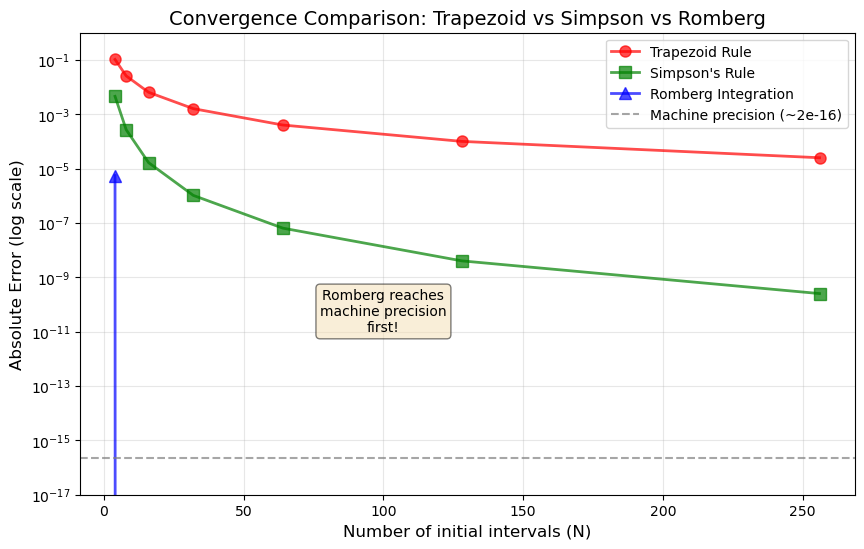


To reach accuracy of 1e-10:
  Trapezoid Rule: Needs N > 256
  Simpson's Rule: Needs N > 256
  Romberg:        N = 8 (error = 0.00e+00)


In [16]:
import matplotlib.pyplot as plt

# For a fair comparison, we need to control what Romberg is actually doing
# Let's compute errors at fixed N values for both methods

N_values = [4, 8, 16, 32, 64, 128, 256]
trap_errors = []
simp_errors = []
romberg_errors = []

print(f"{'N':<8} {'Trapezoid Error':<20} {'Simpson Error':<20} {'Romberg Error':<20}")
print("-" * 70)

for N in N_values:
    # Trapezoid error
    trap_result = intg.trapezoidrule(f, a, b, N)
    trap_err = abs(trap_result - exact_value)
    trap_errors.append(trap_err)
    
    # Simpson error (if N is even)
    if N % 2 == 0:
        simp_result = intg.simpsonrule(f, a, b, N)
        simp_err = abs(simp_result - exact_value)
        simp_errors.append(simp_err)
    else:
        simp_errors.append(np.nan)
    
    # Romberg with this starting N (but let it iterate to high accuracy)
    romberg_result = intg.rombergrule(f, a, b, N, accuracy=1e-15)
    romberg_err = abs(romberg_result - exact_value)
    romberg_errors.append(romberg_err)
    
    print(f"{N:<8} {trap_err:<20.2e} {simp_err:<20.2e} {romberg_err:<20.2e}")

# Plot convergence
plt.figure(figsize=(10, 6))
plt.semilogy(N_values, trap_errors, 'ro-', 
            linewidth=2, markersize=8, label='Trapezoid Rule', alpha=0.7)
plt.semilogy([n for n in N_values if n%2==0], [e for n,e in zip(N_values, simp_errors) if n%2==0], 
            'gs-', linewidth=2, markersize=8, label="Simpson's Rule", alpha=0.7)
plt.semilogy(N_values, romberg_errors, 'b^-', 
            linewidth=2, markersize=8, label='Romberg Integration', alpha=0.7)

# Add a horizontal line at machine epsilon
machine_eps = np.finfo(float).eps
plt.axhline(y=machine_eps, color='gray', linestyle='--', linewidth=1.5, 
           alpha=0.7, label=f'Machine precision (~{machine_eps:.0e})')

plt.xlabel('Number of initial intervals (N)', fontsize=12)
plt.ylabel('Absolute Error (log scale)', fontsize=12)
plt.title('Convergence Comparison: Trapezoid vs Simpson vs Romberg', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, which='both')
plt.ylim(1e-17, 1e0)

# Add annotation
plt.text(100, 1e-11, 'Romberg reaches\nmachine precision\nfirst!', 
        fontsize=10, ha='center', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

# Find where each method reaches a certain accuracy threshold
threshold = 1e-10
print(f"\nTo reach accuracy of {threshold:.0e}:")
for i, N in enumerate(N_values):
    if trap_errors[i] < threshold:
        print(f"  Trapezoid Rule: N = {N} (error = {trap_errors[i]:.2e})")
        break
else:
    print(f"  Trapezoid Rule: Needs N > {N_values[-1]}")

for i, N in enumerate(N_values):
    if N % 2 == 0 and simp_errors[i] < threshold:
        print(f"  Simpson's Rule:  N = {N} (error = {simp_errors[i]:.2e})")
        break
else:
    print(f"  Simpson's Rule: Needs N > {N_values[-1]}")
    
for i, N in enumerate(N_values):
    if romberg_errors[i] < threshold:
        print(f"  Romberg:        N = {N} (error = {romberg_errors[i]:.2e})")
        break
else:
    print(f"  Romberg: Needs N > {N_values[-1]}")

### What Just Happened?

Look at the Romberg tableau carefully:

1. **First column** ($R_{i,1}$): These are just Trapezoid Rule results with increasing N
   - Still has significant error
   - Improves slowly as we double N

2. **Second column** ($R_{i,2}$): First extrapolation
   - Eliminates the h² error term
   - Accuracy jumps dramatically!
   - Roughly equivalent to Simpson's Rule

3. **Third column and beyond**: Further extrapolations
   - Each step eliminates the next error term
   - Accuracy improves exponentially
   - Quickly approaches machine precision (~10⁻¹⁶)

4. **The diagonal** ($R_{i,i}$): Best estimates
   - These are the most refined values at each level
   - Each one uses information from all previous calculations

### The Power of Romberg Integration

**Why is this so effective?**

- **Reuses computations**: Each trapezoid calculation reuses function evaluations from the previous level
- **Systematic error elimination**: Each extrapolation removes the dominant error term
- **Exponential convergence**: Error decreases exponentially, not just polynomially
- **Adaptive**: Automatically refines until target accuracy is reached

**Practical advantages:**
- Can achieve 10⁻¹⁰ accuracy with relatively few function evaluations
- Much more efficient than simply using tiny step sizes
- Built-in error estimation tells you when to stop

### When to Use Romberg Integration

**Use Romberg when:**
- You need high accuracy (many significant figures)
- You can evaluate the function at any point (not limited to fixed data)
- The function is smooth (no sharp corners or discontinuities)
- You want automatic adaptive refinement

**Don't use Romberg when:**
- You have pre-existing data at fixed points (can't choose new sample points)
- The function has discontinuities or sharp features
- Simple accuracy is sufficient (Trapezoid or Simpson is easier)
- Function evaluations are extremely expensive (Romberg needs many evaluations)

**The bottom line**: Romberg Integration is one of the most powerful techniques for smooth, well-behaved functions where high accuracy is needed!

---
## Using Python's Built-in Integration Tools

Python has powerful integration tools in the `scipy.integrate` module. These are production-quality implementations that you should use in real research and applications. Let's see how they compare to our custom functions.

### Why use scipy.integrate?

- **Highly optimized**: Written in C/Fortran for speed
- **Well-tested**: Used by scientists worldwide
- **Adaptive**: Automatically adjusts step sizes for optimal accuracy
- **Feature-rich**: Handles special cases (infinite limits, singularities, etc.)

Let's compare our custom functions with scipy's implementations:

In [1]:
import scipy.integrate as sci
sci?

Type:        module
String form: <module 'scipy.integrate' from 'C:\\Users\\tomke\\anaconda3\\Lib\\site-packages\\scipy\\integrate\\__init__.py'>
File:        c:\users\tomke\anaconda3\lib\site-packages\scipy\integrate\__init__.py
Docstring:  
Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose N-D integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   qmc_qu

The second line will list how the contents and summary of the functions within the module *scipy.integrate*. Also note that I have included my own integration algorithms (**user beware**) in `integrate.py`.


For these examples, we'll switch it up and evaluate an integral that has great importance in statistical mechanics,
$$ \int_a^b \frac{x^3}{e^{x}-1} dx $$

In [17]:
import scipy.integrate as sci
import integrate as intg
import numpy as np

# Define a test function - important in statistical mechanics!
# This integral appears in calculating blackbody radiation
def f(x):
    return x**3 / (np.exp(x) - 1)

a, b = 1, 8
N = 100

print("Comparing custom functions with scipy.integrate")
print("=" * 70)
print(f"Integrating x³/(e^x - 1) from {a} to {b}")
print("=" * 70)

# Trapezoid Rule
custom_trap = intg.trapezoidrule(f, a, b, N)
x_array = np.linspace(a, b, N+1)
y_array = f(x_array)
scipy_trap = sci.trapezoid(y_array, x_array)

print(f"\nTrapezoid Rule (N={N}):")
print(f"  Custom function:  {custom_trap:.10f}")
print(f"  scipy.trapezoid: {scipy_trap:.10f}")
print(f"  Difference:       {abs(custom_trap - scipy_trap):.2e}")

# Simpson's Rule
custom_simp = intg.simpsonrule(f, a, b, N)
scipy_simp = sci.simpson(y_array, x=x_array)

print(f"\nSimpson's Rule (N={N}):")
print(f"  Custom function: {custom_simp:.10f}")
print(f"  scipy.simpson:   {scipy_simp:.10f}")
print(f"  Difference:      {abs(custom_simp - scipy_simp):.2e}")

# Romberg Integration
custom_romb = intg.rombergrule(f, a, b, max_iters=8, accuracy=1e-10)
scipy_romb = sci.romberg(f, a, b)

print(f"\nRomberg Integration:")
print(f"  Custom function: {custom_romb:.10f}")
print(f"  scipy.romberg:   {scipy_romb:.10f}")
print(f"  Difference:      {abs(custom_romb - scipy_romb):.2e}")

# The most general scipy function: quad (adaptive quadrature)
result, error = sci.quad(f, a, b)

print(f"\nscipy.quad (adaptive, high-accuracy):")
print(f"  Result:          {result:.10f}")
print(f"  Error estimate:  {error:.2e}")
print(f"\nNote: scipy.quad is the 'gold standard' - use this in real applications!")

Comparing custom functions with scipy.integrate
Integrating x³/(e^x - 1) from 1 to 8

Trapezoid Rule (N=100):
  Custom function:  6.0144377174
  scipy.trapezoid: 6.0144377174
  Difference:       8.88e-16

Simpson's Rule (N=100):
  Custom function: 6.0148187577
  scipy.simpson:   6.0148187577
  Difference:      8.88e-16

Romberg Integration:
  Custom function: 6.0148186069
  scipy.romberg:   6.0148186069
  Difference:      9.92e-13

scipy.quad (adaptive, high-accuracy):
  Result:          6.0148186069
  Error estimate:  6.50e-13

Note: scipy.quad is the 'gold standard' - use this in real applications!


C:\Users\tomke\AppData\Local\Temp\ipykernel_17792\2248812717.py:40: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  scipy_romb = sci.romberg(f, a, b)


### Which Integration Function Should You Use?

**For learning and understanding algorithms:**
- Use your custom `integrate.py` functions
- They show you exactly what's happening under the hood

**For real research and applications:**
- **`scipy.integrate.quad()`** - Your default choice for 1D integration
  - Adaptive: automatically finds the right step size
  - Handles difficult integrals (oscillatory, peaked, etc.)
  - Returns both result and error estimate
  
- **`scipy.integrate.trapezoid()` or `scipy.integrate.simpson()`** - When you have pre-existing data points
  - Can't choose new sample locations
  - Fast for regularly-spaced data
  
- **`scipy.integrate.romberg()`** - Probably never since this function is deprecated and slated for removal.

**The bottom line**: For homework and learning, use your custom functions. For research, use `scipy.quad()` unless you have a specific reason not to.

---
## Multiple Integrals (Advanced)

So far we've integrated functions of one variable: $\int_a^b f(x)\,dx$. In physics and engineering, we often need to integrate over 2D or 3D regions:

- **Surface integrals**: Electric flux through a surface
- **Volume integrals**: Total mass or charge in a region  
- **Probability**: Normalizing multi-variable distributions

Python's `scipy.integrate` handles this with `dblquad()` (double integrals) and `tplquad()` (triple integrals).

**Important**: The order of limits in Python is *reversed* from standard mathematical notation!

### Double Integral Example

Compute: $$\int_{0}^{3}\int_{0}^{1-2x} x^2 y\,dy\,dx$$

Notice the inner integral has limits that depend on x.

In [18]:
# Define the integrand
def integrand(y, x):  # Note: arguments are in reverse order!
    return x**2 * y

# Define the limits
# Inner integral: y from 0 to (1-2x)
# Outer integral: x from 0 to 3
result, error = sci.dblquad(integrand, 
                            0, 3,              # x limits (outer)
                            lambda x: 0,        # y lower limit (inner)
                            lambda x: 1 - 2*x)  # y upper limit (inner)

print(f"Double integral result: {result:.6f}")
print(f"Error estimate: {error:.2e}")

Double integral result: 61.200000
Error estimate: 1.24e-12


**Key points about double integrals in Python:**
1. Function arguments are reversed: `def f(y, x)` not `def f(x, y)`
2. Limits are specified outer-to-inner: x limits first, then y limits
3. Variable limits use lambda functions: `lambda x: 1-2*x`

The triple integral below is $$\int_{0}^{2}\int_{0}^{3-x}\int_{1}^{4-x-y}x^2y+3z$$

In [ ]:
# Triple integral example
# ∫∫∫ (x²y + 3z) dz dy dx
# where: x from 0 to 2, y from 0 to (3-x), z from 1 to (4-x-y)

def integrand_3d(z, y, x):  # Reversed order!
    return x**2 * y + 3 * z

result, error = sci.tplquad(integrand_3d,
                            0, 2,                    # x limits (outermost)
                            lambda x: 0,             # y lower
                            lambda x: 3 - x,         # y upper
                            lambda x, y: 1,          # z lower
                            lambda x, y: 4 - x - y)  # z upper

print(f"Triple integral result: {result:.6f}")
print(f"Error estimate: {error:.2e}")

---
## Exercise: The Anharmonic Oscillator

### Background

In introductory physics, you studied the *simple harmonic oscillator* - a mass on a spring with potential energy $V(x) = \frac{1}{2}kx^2$. This oscillator has a special property: its period $T$ doesn't depend on the amplitude $A$. Whether you pull the mass back 1 cm or 10 cm, it takes the same time to complete one oscillation.

But real oscillators aren't *perfectly* harmonic. A pendulum with large swings, a vibrating molecule, or a spring stretched beyond its linear range all have more complicated potentials. These **anharmonic oscillators** have periods that depend on amplitude, and we can't write down a simple formula for $T(A)$.

However, we *can* compute $T(A)$ numerically using integration!

### The Physics

For any oscillator with potential $V(x)$, conservation of energy gives:

$$E = \frac{1}{2}m\left(\frac{dx}{dt}\right)^2 + V(x)$$

If the oscillator starts at maximum displacement $x = a$ (the amplitude) with zero velocity, then $E = V(a)$.

At any other position, the velocity is:

$$\frac{dx}{dt} = \sqrt{\frac{2}{m}[V(a) - V(x)]}$$

The period is four times the time to go from $x=0$ to $x=a$:

$$T = 4\int_{0}^{a} \frac{dx}{\sqrt{\frac{2}{m}[V(a) - V(x)]}}$$

For simplicity, let's set $m = 1$.

### Your Tasks

**1. Harmonic Oscillator** (Warm-up)

For the harmonic potential $V(x) = x^2$, write a function that computes the period $T$ as a function of amplitude $a$ using numerical integration.

- Use `scipy.integrate.quad()` for the integration
- Test with amplitudes $a = 0.5, 1, 2, 4$
- **Verify** that the period is constant (doesn't depend on $a$) as expected
- Compare to the theoretical value: $T = 2\pi\sqrt{m/k} = 2\pi$ (since we set $k=1, m=1$)

**Hint**: The integrand has a singularity at $x=a$ (division by zero). To avoid this, integrate from 0 to $a - \epsilon$ where $\epsilon$ is a small number like 0.001.

**2. Anharmonic Oscillator**

Now consider the anharmonic potential $V(x) = x^4$. This represents a "stiff" spring that gets harder to stretch as you pull it further.

- Compute $T(a)$ for amplitudes $a = 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0$
- Create a plot of $T$ vs $a$
- Does the period increase or decrease with amplitude?
- **Physical interpretation**: Why does this make sense?

**3. Comparison**

Create a single plot comparing the period vs amplitude for both the harmonic ($V = x^2$) and anharmonic ($V = x^4$) oscillators.

- Use different colors/markers for each
- Add labels and a legend
- What's the qualitative difference between the two curves?

In [12]:
import numpy as np
import scipy.integrate as sci
import matplotlib.pyplot as plt

def period(Vfunc, a, m=1, ep = 0.0000):
    """
    Compute the period of an oscillator with potential V(x) and amplitude a
    """
     #period function
    ifunc = lambda x: 4/np.sqrt(2/m*(Vfunc(a) - Vfunc(x)))
    T = sci.quad(ifunc,0, a*(1-ep))
    
    return T[0]

In [5]:
V2 = lambda x: x**2

In [15]:
a = [0.5,1,2,4,8]
T = []
for k in a:
    Tper = period(V2,k)
    T.append(Tper)
print(T)

[4.442882938158317, 4.442882938158317, 4.442882938158317, 4.442882938158317, 4.442882938158317]


In [28]:
V4 = lambda x: x**3

In [29]:
a = [0.5,1,2,4,8]
T = []
for k in a:
    Tper = period(V4,k)
    T.append(Tper)
print(T)

[5.608728421303571, 3.965969900537411, 2.8043642106517854, 1.9829849502687056, 1.4021821053258927]


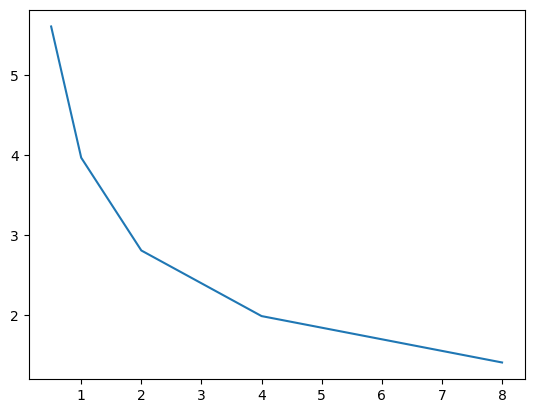

In [30]:
plt.plot(a,T)